<a href="https://colab.research.google.com/github/Vishwaak/Time-for-Machine/blob/master/First_Multi_layer_Netwrok.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import torch

import helper

import matplotlib.pyplot as plt

In [0]:
from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

# Download and load the training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

In [0]:
dataiter = iter(trainloader)
images , labels = dataiter.next()
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


tensor(7)


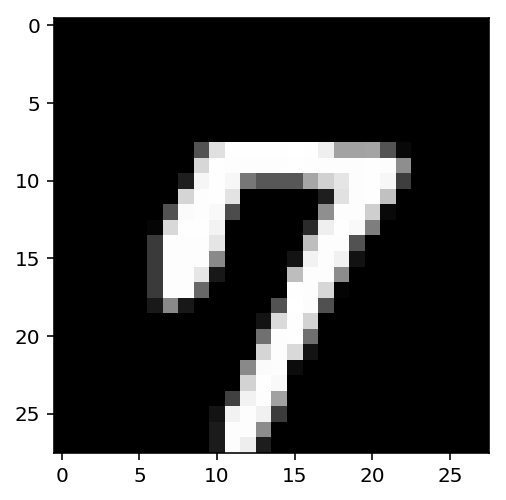

In [0]:
plt.imshow(images[1].numpy().squeeze() ,cmap='Greys_r')
print(labels[1])

In [0]:
def activation(x):
  return 1/(1+torch.exp(-x))

inputs = images.view(images.shape[0] , -1)

w1 = torch.randn(784,256)
b1 = torch.randn(256)

w2 = torch.randn(256,10)
b2 = torch.randn(10)

h= activation(torch.mm(inputs , w1) + b1)
out = torch.mm(h,w2) + b2

In [0]:

def softmax(x):
  return (torch.exp(x)/torch.sum(torch.exp(x) , dim=1).view(-1,1))
probability = softmax(out)

print(probability.shape)
print(probability.sum(dim =1))

torch.Size([64, 10])
tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000])


In [0]:
import torch.nn as nn 

class Network(nn.Module):
    def __init__(self):
        super().__init__()
        # Inputs to hidden layer linear transformation
        self.hidden = nn.Linear(784, 256)
        # Output layer, 10 units - one for each digit
        self.output = nn.Linear(256, 10)
        
    def forward(self, x):
        # Hidden layer with sigmoid activation
        x = F.sigmoid(self.hidden(x))
        # Output layer with softmax activation
        x = F.softmax(self.output(x), dim=1)
        
        return x

In [0]:
model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1))

# Define the loss
criterion = nn.CrossEntropyLoss()

# Get our data
images, labels = next(iter(trainloader))
# Flatten images
images = images.view(images.shape[0], -1)

# Forward pass, get our log-probabilities
logits = model(images)
# Calculate the loss with the logits and the labels
loss = criterion(logits, labels)

print(loss)

tensor(2.3409, grad_fn=<NllLossBackward>)


In [0]:
model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1))

# Define the loss
criterion = nn.NLLLoss()

# Get our data
images, labels = next(iter(trainloader))
# Flatten images
images = images.view(images.shape[0], -1)

# Forward pass, get our log-probabilities
logits = model(images)
# Calculate the loss with the logits and the labels
loss = criterion(logits, labels)

print(loss)

tensor(2.3036, grad_fn=<NllLossBackward>)


In [0]:
print('Before backward pass: \n' , model[0].weight.grad)

loss.backward()

print('After backward pass: \n' , model[0].weight.grad)

Before backward pass: 
 None
After backward pass: 
 tensor([[ 4.3180e-04,  4.3180e-04,  4.3180e-04,  ...,  4.3180e-04,
          4.3180e-04,  4.3180e-04],
        [-8.4394e-05, -8.4394e-05, -8.4394e-05,  ..., -8.4394e-05,
         -8.4394e-05, -8.4394e-05],
        [-1.5423e-04, -1.5423e-04, -1.5423e-04,  ..., -1.5423e-04,
         -1.5423e-04, -1.5423e-04],
        ...,
        [ 7.5457e-04,  7.5457e-04,  7.5457e-04,  ...,  7.5457e-04,
          7.5457e-04,  7.5457e-04],
        [ 5.0900e-03,  5.0900e-03,  5.0900e-03,  ...,  5.0900e-03,
          5.0900e-03,  5.0900e-03],
        [ 4.0394e-04,  4.0394e-04,  4.0394e-04,  ...,  4.0394e-04,
          4.0394e-04,  4.0394e-04]])


In [0]:
from torch import optim

# Optimizers require the parameters to optimize and a learning rate
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [0]:
print('Initial weights - ', model[0].weight)

images, labels = next(iter(trainloader))
images.resize_(64, 784)

# Clear the gradients, do this because gradients are accumulated
optimizer.zero_grad()

# Forward pass, then backward pass, then update weights
output = model(images)
loss = criterion(output, labels)
loss.backward()
print('Gradient -', model[0].weight.grad)

Initial weights -  Parameter containing:
tensor([[-0.0018,  0.0082, -0.0162,  ..., -0.0135, -0.0293,  0.0221],
        [ 0.0113, -0.0306,  0.0223,  ..., -0.0256, -0.0256,  0.0280],
        [ 0.0204, -0.0318,  0.0313,  ...,  0.0233,  0.0017,  0.0230],
        ...,
        [ 0.0327,  0.0008,  0.0233,  ..., -0.0009, -0.0211, -0.0241],
        [-0.0287,  0.0122,  0.0185,  ..., -0.0047, -0.0352, -0.0351],
        [ 0.0207, -0.0228,  0.0157,  ..., -0.0147, -0.0033, -0.0309]],
       requires_grad=True)
Gradient - tensor([[-7.3267e-03, -7.3267e-03, -7.3267e-03,  ..., -7.3267e-03,
         -7.3267e-03, -7.3267e-03],
        [-4.7552e-05, -4.7552e-05, -4.7552e-05,  ..., -4.7552e-05,
         -4.7552e-05, -4.7552e-05],
        [ 1.3015e-04,  1.3015e-04,  1.3015e-04,  ...,  1.3015e-04,
          1.3015e-04,  1.3015e-04],
        ...,
        [-3.3157e-04, -3.3157e-04, -3.3157e-04,  ..., -3.3157e-04,
         -3.3157e-04, -3.3157e-04],
        [ 2.3984e-03,  2.3984e-03,  2.3984e-03,  ...,  2.3984e

In [0]:
# Take an update step and few the new weights
optimizer.step()
print('Updated weights - ', model[0].weight)

Updated weights -  Parameter containing:
tensor([[-0.0018,  0.0083, -0.0161,  ..., -0.0134, -0.0292,  0.0222],
        [ 0.0113, -0.0306,  0.0223,  ..., -0.0256, -0.0256,  0.0280],
        [ 0.0204, -0.0318,  0.0313,  ...,  0.0233,  0.0017,  0.0230],
        ...,
        [ 0.0327,  0.0008,  0.0233,  ..., -0.0009, -0.0211, -0.0241],
        [-0.0288,  0.0122,  0.0185,  ..., -0.0047, -0.0352, -0.0351],
        [ 0.0207, -0.0228,  0.0157,  ..., -0.0147, -0.0033, -0.0309]],
       requires_grad=True)


In [0]:
model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1))

criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.003)

epochs = 5

for e in range(epochs):
  running_loss = 0
  for images, labels in trainloader:
    images = images.view(images.shape[0], -1)
    
    optimizer.zero_grad()
    
    output = model.forward(images)
    loss = criterion(output , labels)
    loss.backward()
    optimizer.step()
    
    running_loss += loss.item()
  else:
      print(f"Training loss: {running_loss/len(trainloader)}")

Training loss: 1.8609886568492409
Training loss: 0.8303229662972981
Training loss: 0.5193114361560929
Training loss: 0.4259157420348511
Training loss: 0.38231278620739734


In [0]:
import helper
from torch import F
images , labels = next(iter(trainloader))

img = images[0].view(1,784)

#Turning off gradient to speed up the process
with torch.no_grad():
  logits= model.forward(img)
  
pa = F.softmax(logits , dis= 1)
helper.view_classify(img.view(1,28,28) , pe)

ImportError: ignored